In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [5]:
params = {
    "axes.labelsize": 16,
    "font.size": 16,
    "legend.fontsize": 14,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16,
    "font.family": "sans-serif",
    "axes.grid": False,
}
plt.rcParams.update(params)

In [6]:
df = pd.read_csv("data/housing_data.txt")
area = df.iloc[:, 0].values.reshape(-1, 1)
beds = df.iloc[:, 1].values.reshape(-1, 1)
price = df.iloc[:, 2].values.reshape(-1, 1)

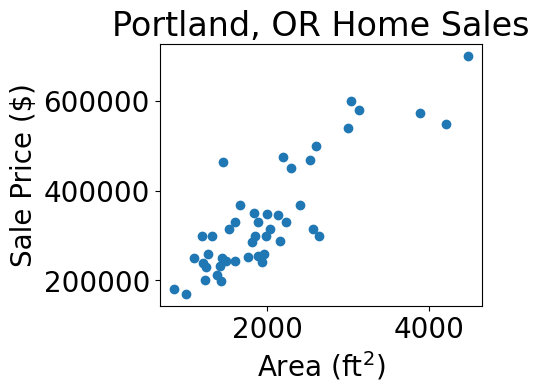

In [10]:
fig, ax = plt.subplots()
ax.plot(area, price, 'o')
ax.set_xlabel(r"Area (ft$^2$)")
ax.set_ylabel(r"Sale Price ($)")
ax.set_title("Portland, OR Home Sales")
fig.set_size_inches(5, 4)
fig.tight_layout(pad=0.5)

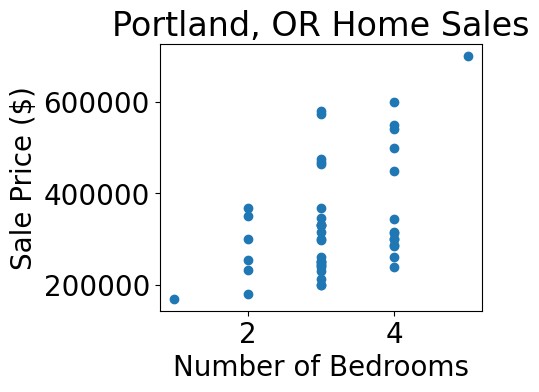

In [11]:
fig, ax = plt.subplots()
ax.plot(beds, price, 'o')
ax.set_xlabel(r"Number of Bedrooms")
ax.set_ylabel(r"Sale Price ($)")
ax.set_title("Portland, OR Home Sales")
fig.set_size_inches(5, 4)
fig.tight_layout(pad=0.5)
plt.show()

Solving the least squares problem using matrix math:

In [12]:
A = np.hstack((np.ones_like(area), area, beds))
b = price
x = np.matmul(np.linalg.inv(np.matmul(A.T, A)), np.matmul(A.T, b))

In [13]:
x

array([[87807.75019324],
       [  138.75587842],
       [-8186.38287595]])

And with a much more standard approach:

In [15]:
X = np.hstack((area, beds))
y = price
model = LinearRegression().fit(X, y)

In [17]:
model.coef_

array([[  138.75587842, -8186.38287595]])

In [18]:
model.intercept_

array([87807.75019324])

Plotting results

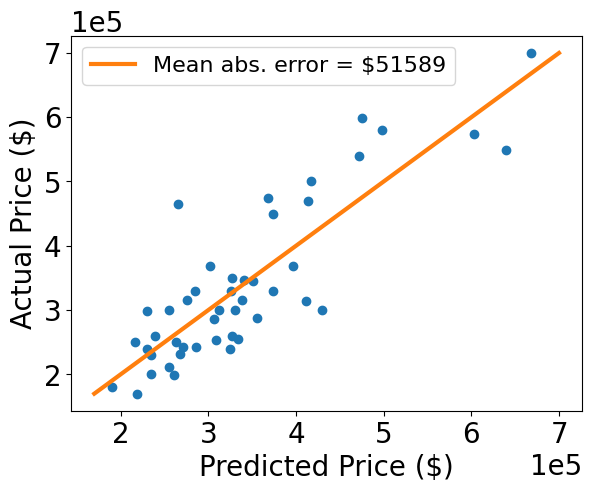

In [20]:
ypred = model.predict(X)
one = np.linspace(np.nanmin(y), np.nanmax(y), 100)
mae = np.nanmean(np.abs(ypred - y))

fig, ax = plt.subplots()
ax.plot(ypred, y, 'o')
ax.plot(one, one, '-', linewidth=3, label=f"Mean abs. error = \${int(mae)}")
ax.set_xlabel(r"Predicted Price ($)")
ax.set_ylabel(r"Actual Price ($)")
ax.legend()
fig.set_size_inches(6, 5)
plt.ticklabel_format(axis='both', style='sci', scilimits=(0,0))
fig.tight_layout(pad=0.5)
plt.show()
